In [1]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.1 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databricks_cli-0.17.7-py3-none-any.whl size=143882 sha256=8fbb04742abd94fa9efc6d4ec05f0c0dd2c64ea95484e68ea142bc966ed04a8c
  Stored in directory: /root/.cache/pip/wheels/ae/63/93/5402c1a09c1868a59d0b05013484e07af97a9d7b3dbd5bd39a
Successfully built databricks-cli


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tensorflow import keras
import mlflow

import pandas as pd
from plotly import express as px
from plotly import graph_objects as go

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv1D, Conv2D, Conv3D, MaxPool2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
tf.__version__# Set your variables for your environment


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

'2.12.0'

In [3]:
import os
import glob
import pandas as pd

def create_dataframe(folder_path):
    image_paths = []
    folder_names = []
    supported_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.png')  # Add or modify extensions as needed

    # Iterate through all files and subdirectories recursively
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(supported_extensions):
                image_paths.append(os.path.join(root, file))
                folder_names.append(os.path.basename(root))
                
# Create a DataFrame from the extracted paths and folder names
    df = pd.DataFrame({'Image_Path': image_paths})
    return df

# Example usage:
folder_path = "/kaggle/input/butterfly-dataset/leedsbutterfly/images"
df = create_dataframe(folder_path)

# Print the DataFrame
df.head()

,Image_Path
0,/kaggle/input/butterfly-dataset/leedsbutterfly...
1,/kaggle/input/butterfly-dataset/leedsbutterfly...
2,/kaggle/input/butterfly-dataset/leedsbutterfly...
3,/kaggle/input/butterfly-dataset/leedsbutterfly...
4,/kaggle/input/butterfly-dataset/leedsbutterfly...


In [4]:
df['Image_name'] = df['Image_Path'].apply(lambda x : str(x).split("/")[-1])
df.head()

,Image_Path,Image_name
0,/kaggle/input/butterfly-dataset/leedsbutterfly...,0020155.png
1,/kaggle/input/butterfly-dataset/leedsbutterfly...,0090177.png
2,/kaggle/input/butterfly-dataset/leedsbutterfly...,0090201.png
3,/kaggle/input/butterfly-dataset/leedsbutterfly...,0100038.png
4,/kaggle/input/butterfly-dataset/leedsbutterfly...,0070055.png


In [5]:
name = {"001": "Danaus plexippus", 
"002" : "Heliconius charitonius",
"003": "Heliconius erato",	
"004": "Junonia coenia",
"005": "Lycaena phlaeas",
"006": "Nymphalis antiopa",	
"007": "Papilio cresphontes",	
"008": "Pieris rapae",	
"009": "Vanessa atalanta",	
"010": "Vanessa cardui"}


In [6]:
common_name = {"001": "Monarch", 
"002" : "Zebra Longwing",
"003": "Crimson-patched Longwing",	
"004": "Common Buckeye",
"005": "American Copper",
"006": "Mourning Cloak",	
"007": "Giant Swallowtail",	
"008": "Cabbage White",	
"009": "Red Admiral",	
"010": "Painted Lady"}


In [7]:
size = {"001": "89-102 mm", 
"002" : "76-78 mm",
"003": "76-86 mm",	
"004": "51-63 mm",
"005": "22-28 mm",
"006": "73-86 mm",	
"007": "86-140 mm",	
"008": "32-48 mm",	
"009": "44-57 mm",	
"010": "51-57 mm"}

In [8]:
text_description = {"001": "Very large, with FW long and drawn out. Above, bright, burnt-orange with black veins and black margins sprinkled with white dots; FW tip broadly black interrupted by larger white and orange spots. Below, paler, duskier orange. 1 black spot appears between HW cell and margin on male above and below. Female darker with black veins smudged.", 
"002" : "Wings long and narrow. Jet-black above, banded with lemon-yellow (sometimes pale yellow). Beneath similar; bases of wings have crimson spots.",
"003": "Wings long, narrow, and rounded. Black above, crossed on FW by broad crimson patch, and on HW by narrow yellow line. Below, similar but red is pinkish and HW has less yellow.",	
"004": "Wings scalloped and rounded except at drawn-out FW tip. Highly variable. Above, tawny-brown to dark brown; 2 orange bars in FW cell, orange submarginal band on HW, white band diagonally crossing FW. 2 bright eyespots on each wing above: on FW, 1 very small near tip and 1 large eyespot in white FW bar; on HW, 1 large eyespot near upper margin and 1 small eyespot below it. Eyespots black, yellow-rimmed, with iridescent blue and lilac irises. Beneath, FW resembles above in lighter shades; HW eyespots tiny or absent, rose-brown to tan, with vague crescent-shaped markings.",
"005": "Above, FW bright copper or brass-colored with dark spots and margin; HW dark brown with copper margin. Undersides mostly grayish with black dots; FW has some orange, HW has prominent submarginal orange band.",
"006": "Large. Wing margins ragged. Dark with pale margins. Above, rich brownish-maroon, iridescent at close range, with ragged, cream-yellow band, bordered inwardly by brilliant blue spots all along both wings. Below, striated, ash-black with row of blue-green to blue-gray chevrons just inside dirty yellow border.",	
"007": "Very large. Long, dark, spoon-shaped tails have yellow center. Dark brownish-black above with 2 broad bands of yellow spots converging at tip of FW. Orange spot at corner of HW flanked by blue spot above; both recur below, but blue continuing in chevrons across underwing, which also has orange patch. Otherwise, yellow below with black veins and borders. Abdomen yellow with broad black midline tapering at tip; notch on top of abdomen near rear. Thorax has yellow lengthwise spots or stripes.",	
"008": "Milk-white above with charcoal FW tips, black submarginal sex spots on FW (1 on male, 2 on female) and on HW costa. Below, FW tip and HW pale to bright mustard-yellow, speckled with grayish spots and black FW spots.",	
"009": "FW tip extended, clipped. Above, black with orange-red to vermilion bars across FW and on HW border. Below, mottled black, brown, and blue with pink bar on FW. White spots at FW tip above and below, bright blue patch on lower HW angle above and below.",	
"010": "FW tip extended slightly, rounded. Above, salmon-orange with black blotches, black-patterned margins, and broadly black FW tips with clear white spots; outer HW crossed by small black-rimmed blue spots. Below, FW dominantly rose-pink with olive, black, and white pattern; HW has small blue spots on olive background with white webwork. FW above and below has white bar running from costa across black patch near tip."}

In [9]:
df['name_code'] =  df['Image_name'].apply(lambda x : x[:3])
df['scientific_name'] = df['name_code'].map(name)
df['common_name'] = df['name_code'].map(common_name)
df['size'] = df['name_code'].map(size)
df['text_description'] = df['name_code'].map(text_description)
df.head()

,Image_Path,Image_name,name_code,scientific_name,common_name,size,text_description
0,/kaggle/input/butterfly-dataset/leedsbutterfly...,0020155.png,002,Heliconius charitonius,Zebra Longwing,76-78 mm,"Wings long and narrow. Jet-black above, banded..."
1,/kaggle/input/butterfly-dataset/leedsbutterfly...,0090177.png,009,Vanessa atalanta,Red Admiral,44-57 mm,"FW tip extended, clipped. Above, black with or..."
2,/kaggle/input/butterfly-dataset/leedsbutterfly...,0090201.png,009,Vanessa atalanta,Red Admiral,44-57 mm,"FW tip extended, clipped. Above, black with or..."
3,/kaggle/input/butterfly-dataset/leedsbutterfly...,0100038.png,010,Vanessa cardui,Painted Lady,51-57 mm,"FW tip extended slightly, rounded. Above, salm..."
4,/kaggle/input/butterfly-dataset/leedsbutterfly...,0070055.png,007,Papilio cresphontes,Giant Swallowtail,86-140 mm,"Very large. Long, dark, spoon-shaped tails hav..."


In [10]:
width , height = (299, 299)
n_classes = df['scientific_name'].nunique()
print(n_classes)
df.columns

10


Index(['Image_Path', 'Image_name', 'name_code', 'scientific_name',
       'common_name', 'size', 'text_description'],
      dtype='object')

In [11]:
#preprocessing data :
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(#rotation_range=90,
                                                                brightness_range=(0.5,1),
                                                                #shear_range=0.2,
                                                                #zoom_range=0.2,
                                                                channel_shift_range=0.2,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                rescale=1./255,
                                                                validation_split=0.3)


img_generator_flow_train = img_generator.flow_from_dataframe(
    dataframe=df, # the dataframe containing the filename and label column
    directory="/kaggle/input/butterfly-dataset/leedsbutterfly/images", # the directory containing the image files
    x_col="Image_Path", # the name of the column with the filenames
    y_col="scientific_name", # the name of the column with the labels
    target_size=(width, height),
    class_mode = "categorical", 
    batch_size=32, 
    subset="training")

img_generator_flow_valid = img_generator.flow_from_dataframe(
    dataframe=df, # the dataframe containing the filename and label column
    directory="/kaggle/input/butterfly-dataset/leedsbutterfly/images", # the directory containing the image files
    x_col="Image_Path", # the name of the column with the filenames
    y_col="scientific_name", # the name of the column with the labels
    target_size=(width, height),
    class_mode = "categorical", 
    batch_size=32, 
    subset="validation")

Found 583 validated image filenames belonging to 10 classes.
Found 249 validated image filenames belonging to 10 classes.


In [12]:
# Set your variables for your environment
EXPERIMENT_NAME="butterfly_839photos_10classes"

# Set tracking URI to your Heroku application
# mlflow.set_tracking_uri(os.environ["APP_URI"])
mlflow.set_tracking_uri("https://insects-mlflow.herokuapp.com/")


# Set experiment's info 
mlflow.set_experiment(EXPERIMENT_NAME)



# Get our experiment info
experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)

In [13]:
# Call mlflow autolog
mlflow.tensorflow.autolog()

mlflow.end_run()

with mlflow.start_run(experiment_id = experiment.experiment_id):
   
    mlflow.set_tag("user", "céline")
    mlflow.set_tag("model", "inceptionv3")
    mlflow.set_tag("description", "test on dataset with 10 categories")
    
    base_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=(width, height,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )
    base_model.trainable = True

    fine_tune_at = len(base_model.layers) - 0.1*len(base_model.layers)
    fine_tune_at

    for layer in base_model.layers[:int(fine_tune_at)]:
        layer.trainable = False
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalMaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(n_classes, activation="softmax")
    ])
    model.summary()

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                  loss = tf.keras.losses.CategoricalCrossentropy(),
                  metrics = [tf.keras.metrics.CategoricalAccuracy()])
    model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, epochs=100)

87910968/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 21,823,274
Trainable params: 6,094,026
Non-trainable params: 15,729,248
_________________________________________________________________


2023/06/15 16:57:01 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.preprocessing.image.DataFrameIterator'>. Dataset logging skipped.
2023/06/15 16:57:01 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.preprocessing.image.DataFrameIterator'>. Dataset logging skipped.


Epoch 1/100
19/19 [==============================] - 50s 2s/step - loss: 0.7694 - categorical_accuracy: 0.8199 - val_loss: 1.4967 - val_categorical_accuracy: 0.8434
Epoch 2/100
19/19 [==============================] - 21s 1s/step - loss: 0.0766 - categorical_accuracy: 0.9691 - val_loss: 0.1820 - val_categorical_accuracy: 0.9679
Epoch 3/100
19/19 [==============================] - 21s 1s/step - loss: 0.0933 - categorical_accuracy: 0.9880 - val_loss: 0.1104 - val_categorical_accuracy: 0.9799
Epoch 4/100
19/19 [==============================] - 20s 1s/step - loss: 0.0753 - categorical_accuracy: 0.9811 - val_loss: 1.4767 - val_categorical_accuracy: 0.8675
Epoch 5/100
19/19 [==============================] - 21s 1s/step - loss: 0.0351 - categorical_accuracy: 0.9914 - val_loss: 0.0085 - val_categorical_accuracy: 0.9920
Epoch 6/100
19/19 [==============================] - 21s 1s/step - loss: 0.0142 - categorical_accuracy: 0.9966 - val_loss: 0.1301 - val_categorical_accuracy: 0.9799
Epoch 7/10

2023/06/15 17:42:23 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/06/15 17:42:23 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2023/06/15 17:43:34 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp7vpxffev/model, flavor: tensorflow), fall back to return ['tensorflow==2.12.0']. Set logging level to DEBUG to see the full traceback.


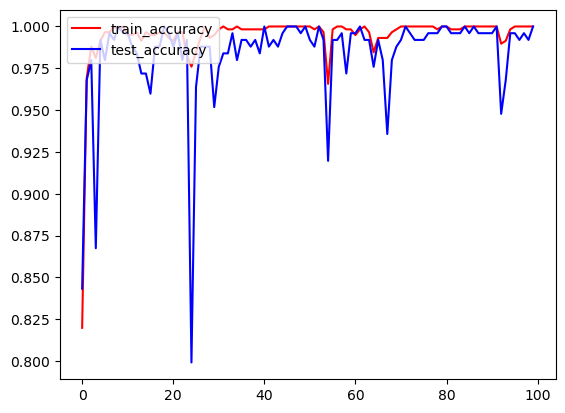

In [14]:
# Visualise train / Valid Accuracy
plt.plot(model.history.history["categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()



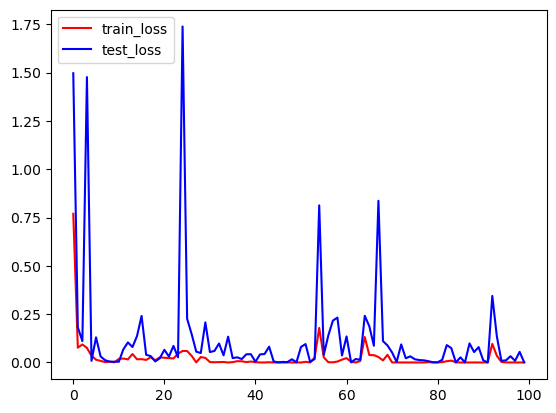

In [15]:
# Visualise train / Valid Loss
plt.plot(model.history.history["loss"], c="r", label="train_loss")
plt.plot(model.history.history["val_loss"], c="b", label="test_loss")
plt.legend(loc="upper left")
plt.show()
